<a href="https://colab.research.google.com/github/gauravkkaushik/Machine-Learning-and-python/blob/main/Predicting_Software_Developer_Salaries_A_Data_Driven_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Software Developer Salaries: A Data-Driven Approach
## Udacity Data Scientist Nanodegree Project 1
**Author:** Gaurav Kaushik
**Date:** January 2026  
**Dataset:** Stack Overflow Developer Survey Results

In [ ]:
# Run this cell to install necessary libraries if you haven't already
# !pip install numpy pandas matplotlib seaborn scikit-learn

In [13]:
# Standard Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Magic command to display charts directly in the notebook
%matplotlib inline

# Setting a clean style for charts
sns.set_theme(style="whitegrid")

# Expand the display limits
pd.set_option('display.max_columns', None)  # Shows all columns
pd.set_option('display.max_rows', 100)      # Shows up to 100 rows before truncating

### 1. Business Understanding
For this project, I will explore the Stack Overflow Developer Survey data to answer:
1. What are the strongest predictors of a developer's annual salary?
2. Does the level of formal education significantly impact earning potential compared to years of experience?
3. How accurately can a simple linear model predict compensation based on professional experience and geography?

# Data Understanding
Load the CSV and look at the first few rows.

In [14]:
# Load the dataset
df = pd.read_csv('survey_results_public.csv',header=0)

# Look at the first 5 rows
print("Data Preview:")
display(df.head())

Data Preview:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [15]:
# Check the shape and data types
print(f"\nDataset Shape: {df.shape}")
print("\nColumn Information:")
df.dtypes


Dataset Shape: (65437, 114)

Column Information:


,0
ResponseId,int64
MainBranch,object
Age,object
Employment,object
RemoteWork,object
...,...
JobSatPoints_11,float64
SurveyLength,object
SurveyEase,object
ConvertedCompYearly,float64


# Data Cleaning

## Missing Data Analysis and Removing columns with High Missing value percentage

Before deciding what to model, we need to know which columns are actually usable. If a column is 90% empty, it’s useless for prediction.

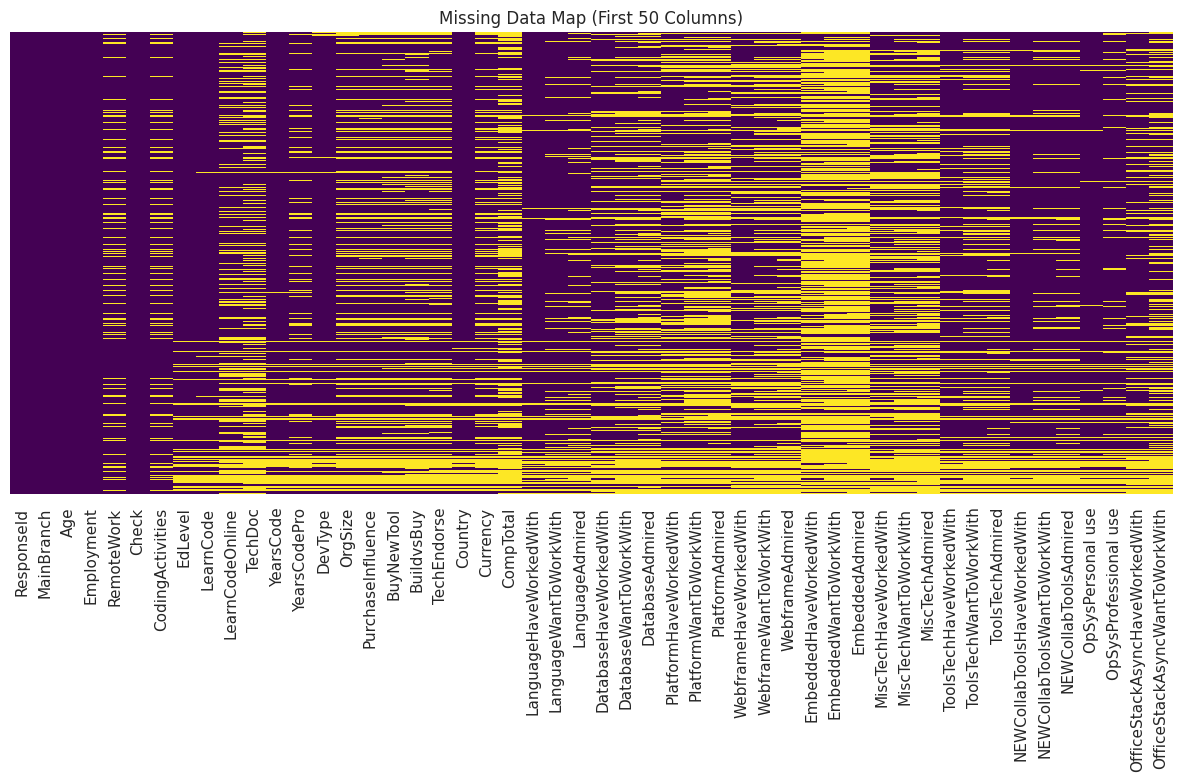

Columns with more than 50% missing data:
AINextMuch less integrated       98.245641
AINextLess integrated            96.401119
AINextNo change                  80.900714
AINextMuch more integrated       79.464217
EmbeddedAdmired                  74.428840
EmbeddedWantToWorkWith           73.103901
EmbeddedHaveWorkedWith           66.052845
ConvertedCompYearly              64.186928
AIToolNot interested in Using    62.690832
AINextMore integrated            62.669438
Knowledge_9                      57.768541
Frequency_3                      57.653927
Knowledge_8                      57.580574
ProfessionalTech                 57.571405
Knowledge_7                      57.550010
Knowledge_6                      57.418586
Knowledge_5                      57.394135
Knowledge_2                      57.178660
Knowledge_4                      57.164907
Knowledge_3                      57.065575
Frustration                      56.827177
Frequency_2                      56.654492
Frequency_1  

In [19]:
# Visualize missing data for the first 50 columns
plt.figure(figsize=(15, 6))
sns.heatmap(df.iloc[:, :50].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Map (First 50 Columns)')
plt.show()

# Calculate percentage of missing values per column
missing_values = df.isnull().mean() * 100
print("Columns with more than 50% missing data:")
print(missing_values[missing_values > 50].sort_values(ascending=False))

drop any column that is missing more than 50% of its values, while protecting our target variable.

In [29]:
# 1. Identify columns with > 50% missing data
missing_probs = df.isnull().mean()
cols_to_drop = missing_probs[missing_probs > 0.50].index.tolist()

# 2. IMPORTANT: Remove 'ConvertedCompYearly' from the drop list
# because we need it as our target variable!
if 'ConvertedCompYearly' in cols_to_drop:
    cols_to_drop.remove('ConvertedCompYearly')

# 3. Drop the columns from the dataframe
df_reduced = df.drop(columns=cols_to_drop)

print(f"Original number of columns: {df.shape[1]}")
print(f"Columns dropped: {len(cols_to_drop)}")
print(f"Remaining columns: {df_reduced.shape[1]}")


Original number of columns: 114
Columns dropped: 43
Remaining columns: 71


## Cleaning Target

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


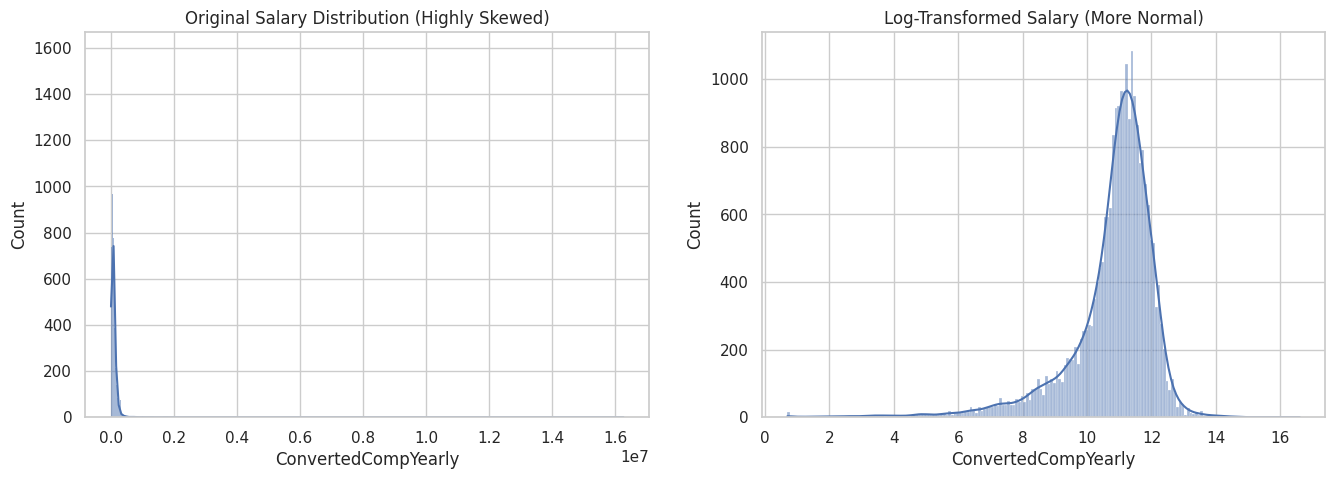

In [30]:
# Statistical summary of compensation
print(df['ConvertedCompYearly'].describe())

# Log Transformation vs Original
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df['ConvertedCompYearly'].dropna(), kde=True, ax=ax[0])
ax[0].set_title('Original Salary Distribution (Highly Skewed)')

sns.histplot(np.log1p(df['ConvertedCompYearly'].dropna()), kde=True, ax=ax[1])
ax[1].set_title('Log-Transformed Salary (More Normal)')
plt.show()

Since we cannot predict a salary for someone who didn't provide one, we remove those rows entirely. This ensures the model learns from actual ground-truth data.

In [ ]:
# Drop rows where the salary (target) is missing
df_clean = df_reduced.dropna(subset=['ConvertedCompYearly'])

print(f"Rows remaining after dropping missing salaries: {df_clean.shape[0]}")

## Removing Target Outliers based on IQR

Because ConvertedCompYearly still has extreme values (some people report $1 or $2,000,000), a Linear Regression model will struggle. We use the Interquartile Range (IQR) method to keep only the realistic data.

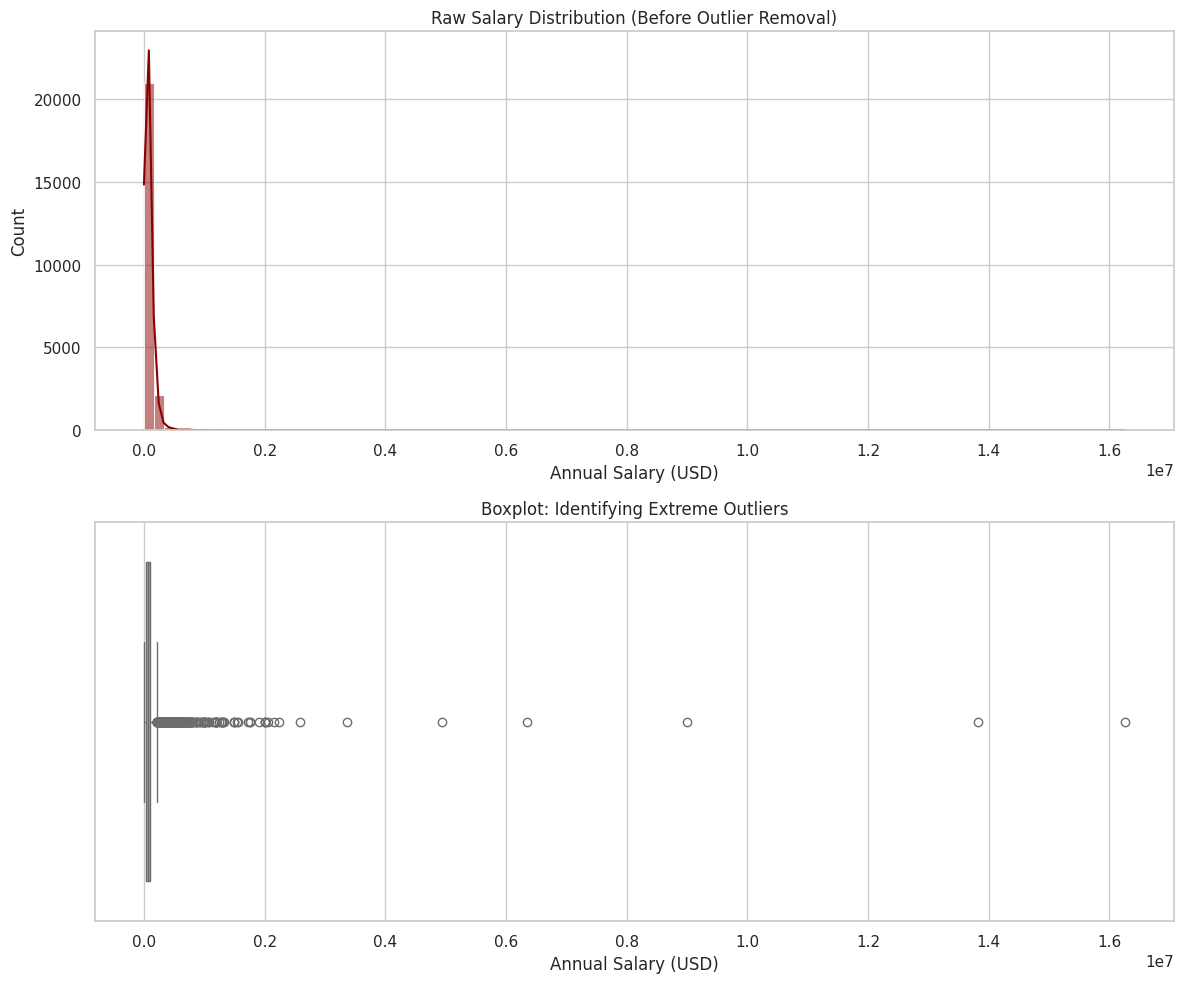

Maximum Salary in raw data: $16,256,603.00
99th Percentile: $393,751.06


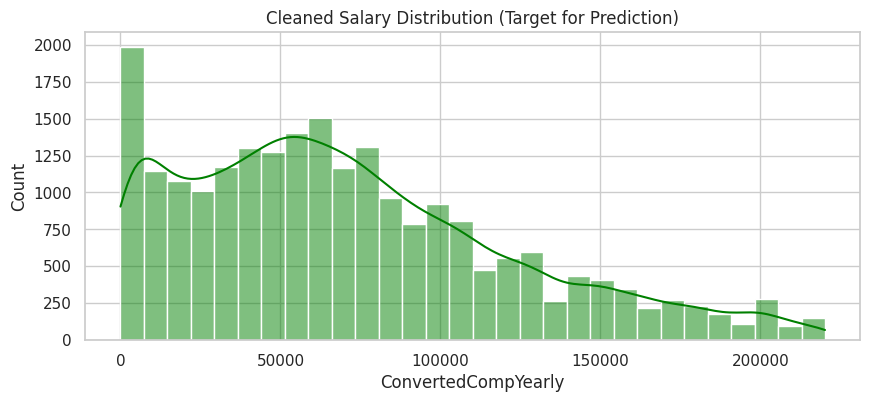

In [35]:
# Create a figure with two subplots: Histogram and Boxplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# 1. Histogram of Raw Salary
sns.histplot(df_clean['ConvertedCompYearly'], bins=100, kde=True, ax=ax1, color='darkred')
ax1.set_title('Raw Salary Distribution (Before Outlier Removal)')
ax1.set_xlabel('Annual Salary (USD)')

# 2. Boxplot of Raw Salary
sns.boxplot(x=df_clean['ConvertedCompYearly'], ax=ax2, color='salmon')
ax2.set_title('Boxplot: Identifying Extreme Outliers')
ax2.set_xlabel('Annual Salary (USD)')

plt.tight_layout()
plt.show()

# Print specific statistics to justify removal
print(f"Maximum Salary in raw data: ${df_clean['ConvertedCompYearly'].max():,.2f}")
print(f"99th Percentile: ${df_clean['ConvertedCompYearly'].quantile(0.99):,.2f}")


# Re-applying the IQR Filter
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_final = df_clean[(df_clean['ConvertedCompYearly'] >= lower_bound) &
                    (df_clean['ConvertedCompYearly'] <= upper_bound)]

# Final check of the clean data
plt.figure(figsize=(10, 4))
sns.histplot(df_final['ConvertedCompYearly'], bins=30, kde=True, color='green')
plt.title('Cleaned Salary Distribution (Target for Prediction)')
plt.show()

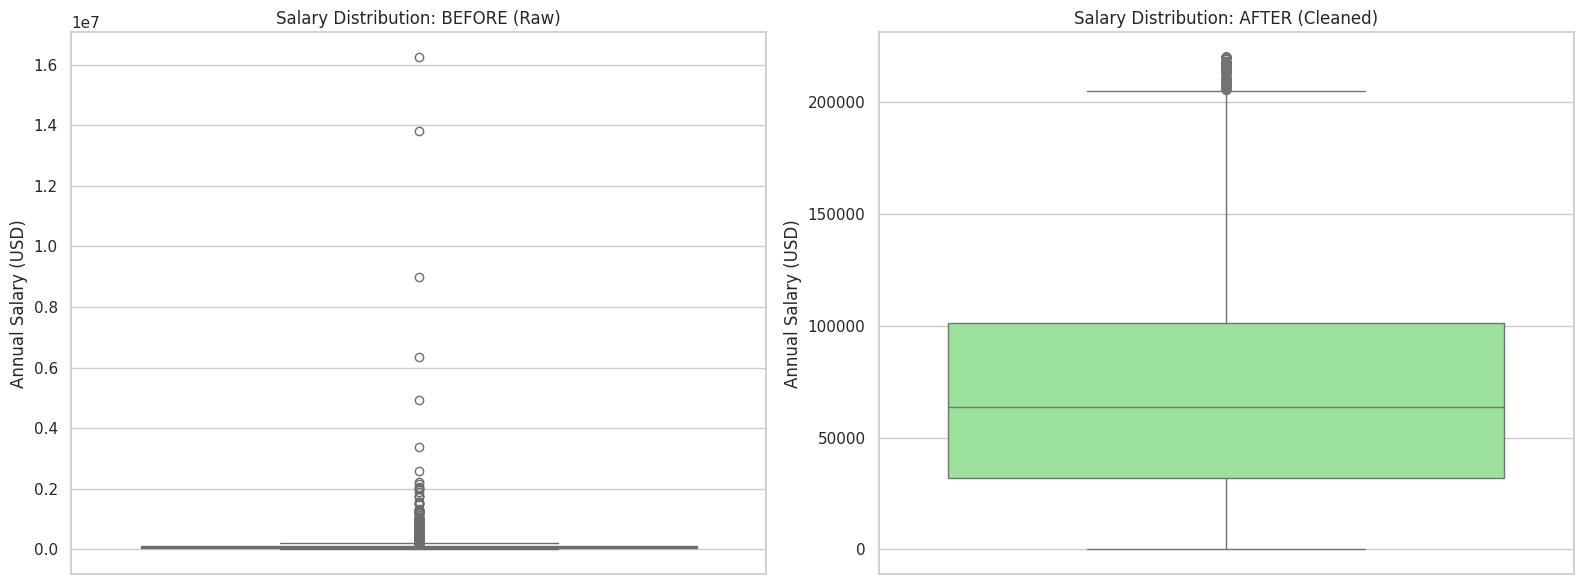

Data points removed as outliers: 978
New Maximum Salary: $220,207.00


In [36]:
# Create a side-by-side comparison of Raw vs. Cleaned Data
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Raw Data (Prior to outlier removal)
sns.boxplot(y=df_clean['ConvertedCompYearly'], ax=ax[0], color='salmon')
ax[0].set_title('Salary Distribution: BEFORE (Raw)')
ax[0].set_ylabel('Annual Salary (USD)')

# Plot 2: Cleaned Data (After IQR filtering)
sns.boxplot(y=df_final['ConvertedCompYearly'], ax=ax[1], color='lightgreen')
ax[1].set_title('Salary Distribution: AFTER (Cleaned)')
ax[1].set_ylabel('Annual Salary (USD)')

plt.tight_layout()
plt.show()

# Quick summary statistics
print(f"Data points removed as outliers: {len(df_clean) - len(df_final)}")
print(f"New Maximum Salary: ${df_final['ConvertedCompYearly'].max():,.2f}")

## Categorical Cardinality Assessment



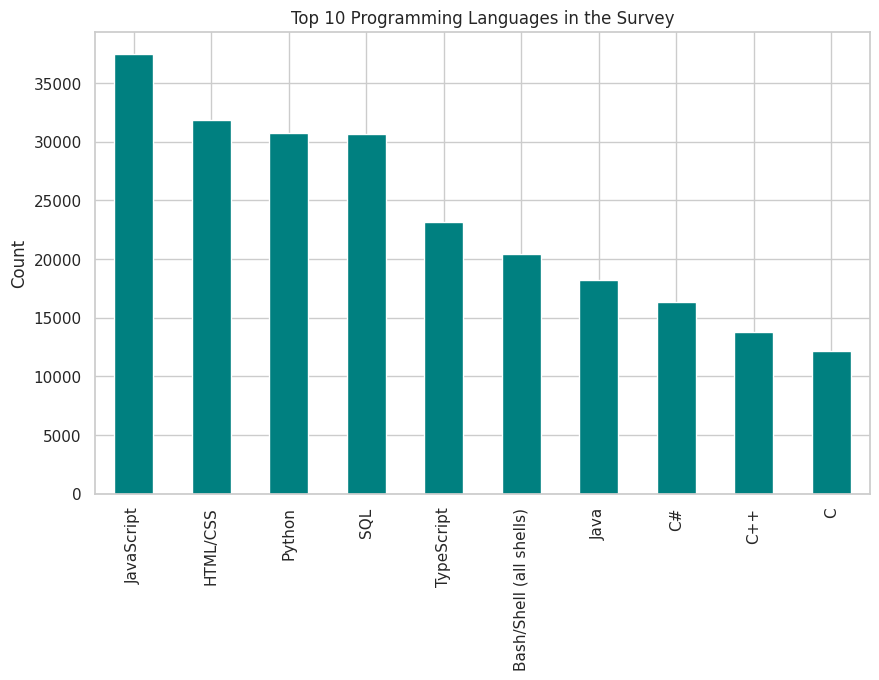

In [21]:
# Checking the most popular programming languages
languages = df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
top_10_langs = languages.sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_langs.plot(kind='bar', color='teal')
plt.title('Top 10 Programming Languages in the Survey')
plt.ylabel('Count')
plt.show()

The language frequency chart provides context on the "supply" of developers in the market.

* **Ubiquity of the Web:** JavaScript and HTML/CSS are the most common skills, used by nearly 38,000 and 32,000 respondents respectively.

* **The Python Surge:** Python ranks third, reinforcing its dominance in Data Science and AI.

* **Insight:** While these languages are popular, they also represent high competition. A predictive model trained on this data would likely show that while these skills are "required," specialized skills in lower-frequency languages (like Rust or TypeScript) might actually drive higher individual salary predictions.

/tmp/ipython-input-2511076716.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final, x='ConvertedCompYearly', y='EdLevel', order=edu_order, palette='viridis')


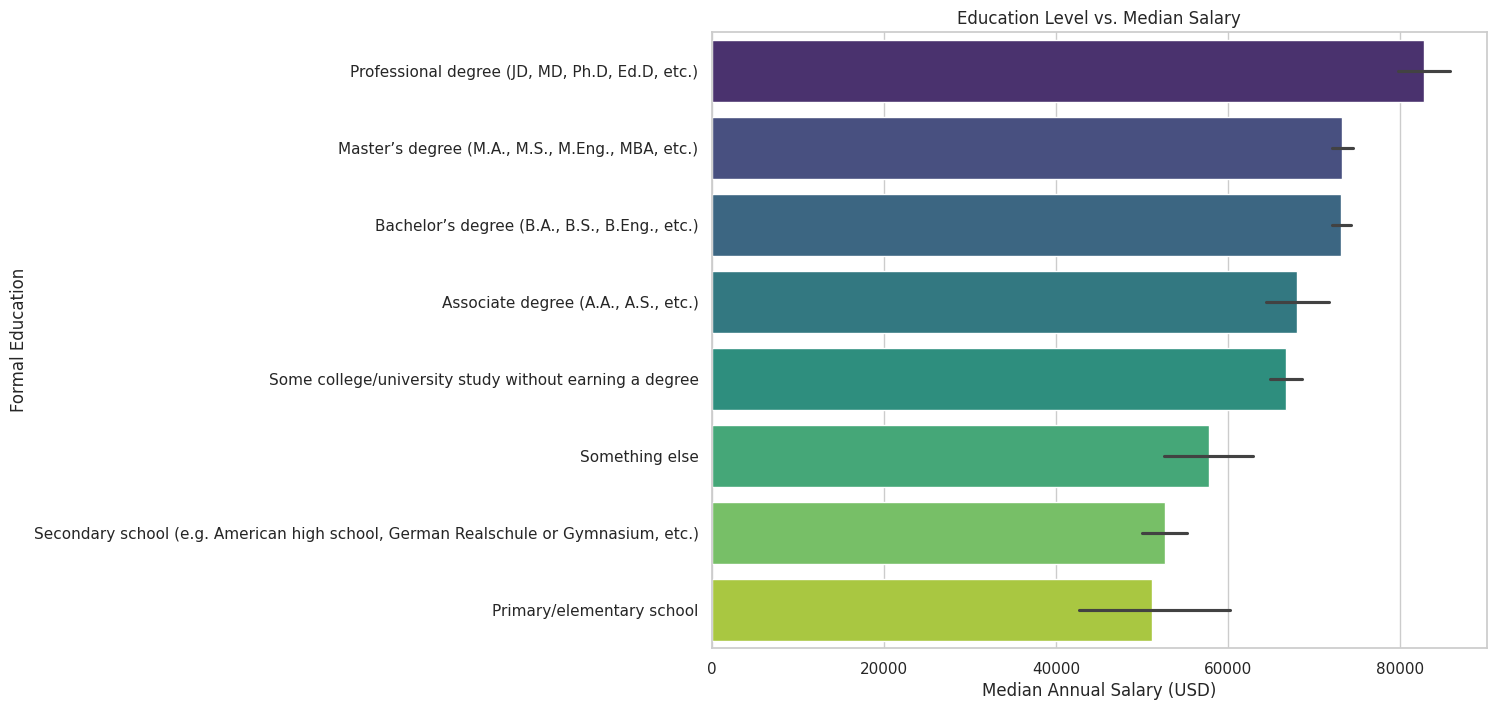

In [38]:
plt.figure(figsize=(10, 8))
# Sorting by median salary for better visualization
edu_order = df_final.groupby('EdLevel')['ConvertedCompYearly'].median().sort_values(ascending=False).index

sns.barplot(data=df_final, x='ConvertedCompYearly', y='EdLevel', order=edu_order, palette='viridis')
plt.title('Education Level vs. Median Salary')
plt.xlabel('Median Annual Salary (USD)')
plt.ylabel('Formal Education')
plt.show()

The median salary bar chart helps us answer whether pursuing higher education translates to higher pay.

* **The Highest Earners:** Those with Professional degrees (JD, MD, Ph.D.) lead the pack at over $80,000 median salary.

* **The "Sweet Spot":** Bachelor's and Master's degrees are nearly identical in their median payout (approx. $73,000).

* **Insight for Self-Taught Devs:** Developers with "Some college study without a degree" or an Associate degree earn medians (approx. $65,000–$68,000) that are surprisingly competitive. This suggests that in tech, the barrier to entry is high, but the "degree ceiling" is relatively soft once you have gained experience.

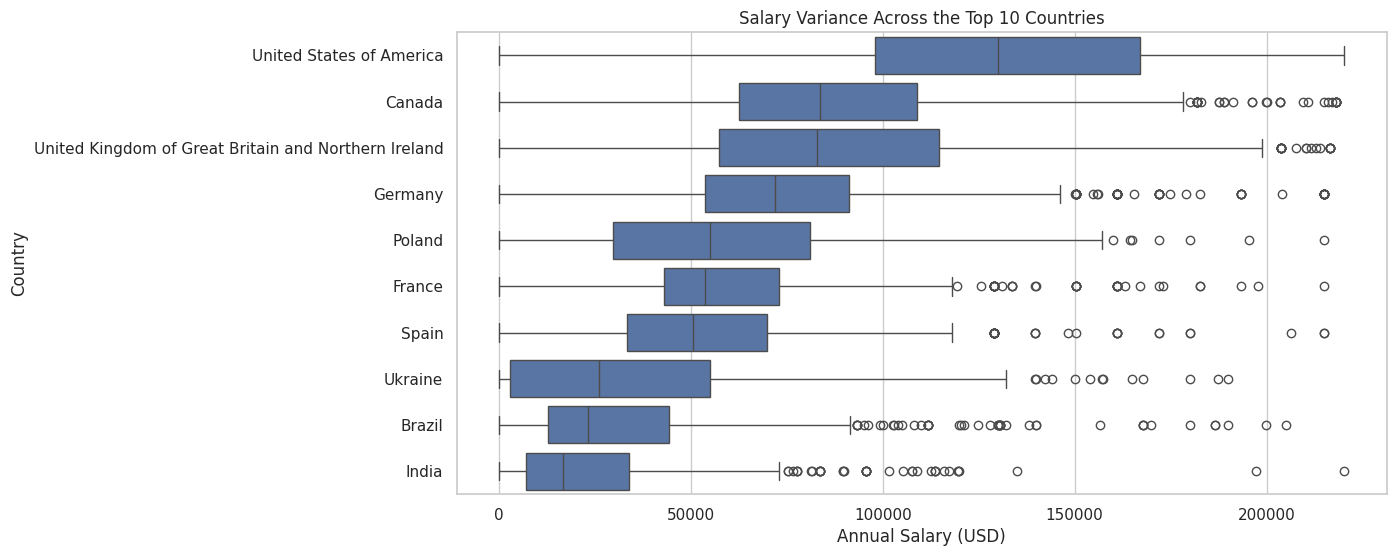

In [39]:
# Focus on the top 10 countries by response count
top_10_countries = df_final['Country'].value_counts().nlargest(10).index
df_top_countries = df_final[df_final['Country'].isin(top_10_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_countries, x='ConvertedCompYearly', y='Country',
            order=df_top_countries.groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False).index)

plt.title('Salary Variance Across the Top 10 Countries')
plt.xlabel('Annual Salary (USD)')
plt.show()

The box plot of salary variance across the top 10 countries provides a stark look at the global tech economy.

* **The US Lead:** The United States clearly dominates the salary landscape, with a median salary significantly higher than any other nation.

* **The "Flattening" of Other Markets:** While Canada, the UK, and Germany offer strong mid-range salaries, markets like India and Brazil show much lower medians.

* **Creative Takeaway**: A developer with 10 years of experience in India may earn less than a junior developer in the US. This highlights that "Market Arbitrage" (working for a US company while living elsewhere) is likely the most effective way for global developers to increase their wealth.

## Average Salary by EdLevel and Years of Experience

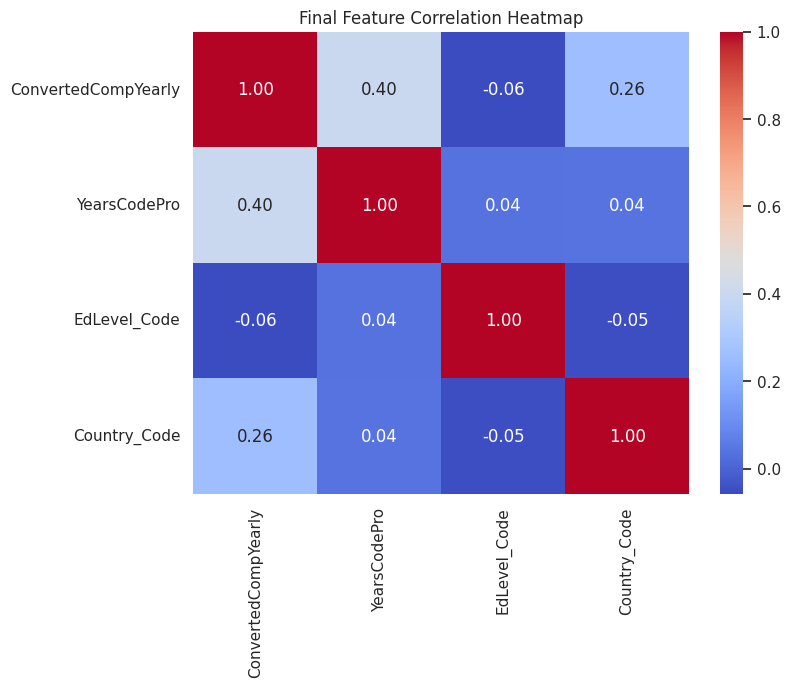

In [44]:
# Temporarily encode for the heatmap
df_corr = df_final[['ConvertedCompYearly', 'YearsCodePro', 'EdLevel', 'Country']].copy()

# Convert 'YearsCodePro' to a numerical format
df_corr['YearsCodePro'] = df_corr['YearsCodePro'].replace({'Less than 1 year': 0, '20 or more years': 20, 'More than 50 years': 50})
df_corr['YearsCodePro'] = pd.to_numeric(df_corr['YearsCodePro'])

df_corr['EdLevel_Code'] = df_corr['EdLevel'].astype('category').cat.codes
df_corr['Country_Code'] = df_corr['Country'].astype('category').cat.codes

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr[['ConvertedCompYearly', 'YearsCodePro', 'EdLevel_Code', 'Country_Code']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Final Feature Correlation Heatmap')
plt.show()

The correlation heatmap reveals the mathematical relationships between our features and the target variable (ConvertedCompYearly).

* **Primary Driver:** Professional experience (YearsCodePro) has the strongest positive correlation (0.40) with salary. This suggests that for every additional year of experience, the model will predict a significant increase in compensation.

* **Geographic Influence:** Location (Country_Code) is the second most influential feature (0.26). This confirms that where a developer lives is a massive factor in their earning potential.

* **The Education Paradox:** Interestingly, formal education level (EdLevel_Code) shows a slightly negative correlation (-0.06) with total compensation. This indicates that once a developer is in the field, their specific degree matters much less than their years on the job and their location.

# Data Preparation

# Modeling

# Evaluation